<div style="background-color:#d9d9d9; padding:15px; border-radius:8px;">
  <h2>Importación de librerías / Library import</h2>
  
  <p>Se importan las librerías necesarias para el procesamiento, visualización y análisis geoespacial de datos:  
  <code>pandas</code> y <code>numpy</code> para manipulación numérica y estructural,  
  <code>unicodedata</code> y <code>ftfy</code> para limpieza y normalización de texto,  
  <code>matplotlib</code> para gráficos,  
  <code>geopandas</code> y <code>folium</code> para visualización geográfica,  
  y <code>IPython.display</code> para mostrar contenido enriquecido en el notebook.  
  También se configuran advertencias y opciones de visualización para facilitar el trabajo con grandes volúmenes de datos.  
  <em>Objetivo:</em> Preparar el entorno técnico para análisis estadístico y geográfico reproducible.</p>
  
  <p>The required libraries for data processing, visualization, and geospatial analysis are imported:  
  <code>pandas</code> and <code>numpy</code> for numerical and structural manipulation,  
  <code>unicodedata</code> and <code>ftfy</code> for text cleaning and normalization,  
  <code>matplotlib</code> for plotting,  
  <code>geopandas</code> and <code>folium</code> for geographic visualization,  
  and <code>IPython.display</code> for rendering rich content in the notebook.  
  Warnings and display options are also configured to support large-scale data exploration.  
  <em>Objective:</em> Set up the technical environment for reproducible statistical and geographic analysis.</p>
</div>

In [1]:
import pandas as pd
import numpy as np
import unicodedata
from ftfy import fix_text
from IPython.display import IFrame, display, Markdown, HTML
import matplotlib.pyplot as plt
import warnings
import geopandas as gpd
import folium
from folium import IFrame
import json
warnings.filterwarnings("ignore", category=UserWarning, module="IPython.core.pylabtools")

pd.set_option('display.max_rows', 100)
pd.set_option('future.no_silent_downcasting', True)

<div style="background-color:#d9d9d9; padding:15px; border-radius:8px;">
  <h2>🧹 Limpieza y normalización del dataset / Dataset cleaning and normalization</h2>
  
  <p>Se carga el archivo <code>elecciones_municipios.csv</code> con codificación <code>latin1</code> y se realiza una limpieza estructural y textual:  
  - Se eliminan columnas irrelevantes relacionadas con códigos internos, zonas y puestos de votación.  
  - Se renombran las columnas para facilitar su interpretación.  
  - Se aplica <code>fix_text</code> para corregir errores de codificación y caracteres especiales.  
  - Se define la función <code>limpiar_texto</code> para normalizar acentos, espacios y caracteres como la letra ñ.  
  - Se estandarizan los nombres de departamentos y municipios con formato <code>title case</code>.  
  - Se guarda el dataset limpio en la ruta <code>../data/processed/elecciones_municipios_limpio.csv</code>.  
  <em>Objetivo:</em> Garantizar que los datos estén estructurados y normalizados para análisis posteriores.</p>
  
  <p>The <code>elecciones_municipios.csv</code> file is loaded using <code>latin1</code> encoding and cleaned both structurally and textually:  
  - Irrelevant columns related to internal codes, zones, and polling stations are dropped.  
  - Columns are renamed for clarity.  
  - <code>fix_text</code> is applied to correct encoding issues and special characters.  
  - A <code>limpiar_texto</code> function is defined to normalize accents, spacing, and characters like ñ.  
  - Department and municipality names are standardized using <code>title case</code>.  
  - The cleaned dataset is saved to <code>../data/processed/elecciones_municipios_limpio.csv</code>.  
  <em>Objective:</em> Ensure the dataset is structured and normalized for further analysis.</p>
</div>

In [2]:
ruta_dataset = "../data/raw/elecciones_municipios.csv"
dataset = pd.read_csv(ruta_dataset, encoding="latin1", low_memory=False)

print("Columnas originales:", dataset.columns.tolist())
print(dataset.head(3))

Columnas originales: ['annoh', 'corp', 'eleccion', 'codcirc', 'nomdepto', 'coddepto', 'nommun', 'codmpio', 'zona', 'nompuesto', 'puesto', 'nomparti', 'codparti', 'nomcandi', 'codcandi', 'votos', 'censo', 'rcd___id']
   annoh  corp   eleccion  codcirc   nomdepto  coddepto    nommun  codmpio  \
0   2019     3  AlcaldÃ­a        2  ANTIOQUIA         1  MEDELLIN        1   
1   2019     3  AlcaldÃ­a        2  ANTIOQUIA         1  MEDELLIN        1   
2   2019     3  AlcaldÃ­a        2  ANTIOQUIA         1  MEDELLIN        1   

     zona                    nompuesto  puesto  \
0  Urbano  SEC. ESC. LA ESPERANZA NO 2     1.0   
1  Urbano  SEC. ESC. LA ESPERANZA NO 2     1.0   
2  Urbano  SEC. ESC. LA ESPERANZA NO 2     1.0   

                                       nomparti  codparti  \
0                         PARTIDO ALIANZA VERDE         4   
1         PARTIDO POLO DEMOCRÃTICO ALTERNATIVO         9   
2  PARTIDO COLOMBIA HUMANA - UNIÃN PATRIÃTICA        10   

                     nomc

In [3]:
dataset = dataset.drop(columns=["corp","codcirc","coddepto","codmpio", "zona", "nompuesto", "puesto", "codcandi", "censo", "rcd___id"])
dataset.columns = ["anio", "eleccion", "departamento", "municipio", "partido_politico", "codigo_partido", "nombre_candidato", "votos"]

In [4]:
for col in ["departamento", "municipio", "eleccion", "partido_politico", "nombre_candidato"]:
    dataset[col] = dataset[col].astype(str).apply(fix_text)

# Función para limpiar texto
def limpiar_texto(texto):
    if pd.isna(texto):
        return ""
    texto = texto.lower().strip()
    texto = "".join(c for c in unicodedata.normalize("NFD", texto)
                    if unicodedata.category(c) != "Mn")
    texto = texto.replace("ñ", "n")
    return texto

In [5]:
for col in ["departamento", "municipio", "eleccion", "partido_politico", "nombre_candidato"]:
    dataset[col] = dataset[col].apply(limpiar_texto)

print(dataset.head(3))

   anio  eleccion departamento municipio  \
0  2019  alcaldia    antioquia  medellin   
1  2019  alcaldia    antioquia  medellin   
2  2019  alcaldia    antioquia  medellin   

                             partido_politico  codigo_partido  \
0                       partido alianza verde               4   
1        partido polo democratico alternativo               9   
2  partido colombia humana - union patriotica              10   

             nombre_candidato  votos  
0                beatriz rave  13753  
1  victor javier correa velez   9670  
2         jairo herran vargas   2829  


In [6]:
columnas_texto = ["anio", "eleccion", "departamento", "municipio", "partido_politico"]

for col in columnas_texto:
    print(f"\n📌 Columna: {col}")
    valores_unicos = sorted(dataset[col].dropna().unique())
    print(f"Total valores únicos: {len(valores_unicos)}")
    print(valores_unicos[:50])



📌 Columna: anio
Total valores únicos: 9
[np.int64(2007), np.int64(2010), np.int64(2011), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2018), np.int64(2019), np.int64(2022)]

📌 Columna: eleccion
Total valores únicos: 14
['alcaldia', 'asamblea departamental', 'camara citrep', 'camara indigena', 'camara negritudes', 'camara territorial', 'concejo', 'consulta anticorrupcion', 'gobernacion', 'plebiscito por la paz', 'presidencia 1era vuelta', 'presidencia 2da vuelta', 'senado indigena', 'senado nacional']

📌 Columna: departamento
Total valores únicos: 35
['amazonas', 'antioquia', 'arauca', 'archipielago de san andres', 'atlantico', 'bogota', 'bolivar', 'boyaca', 'caldas', 'caqueta', 'casanare', 'cauca', 'cesar', 'choco', 'consulados', 'cordoba', 'cundinamarca', 'guainia', 'guaviare', 'huila', 'la guajira', 'magdalena', 'meta', 'narino', 'norte de santander', 'putumayo', 'quindio', 'risaralda', 'san andres', 'santander', 'sucre', 'tolima', 'valle del cauca', 'vaupes', 'vichada']

In [7]:
dataset["departamento"] = dataset["departamento"].replace({
    "san andres": "archipielago de san andres"
})
dataset["departamento"] = dataset["departamento"].str.title()
dataset["municipio"] = dataset["municipio"].str.title()

ruta_salida = "../data/processed/elecciones_municipios_limpio.csv"
dataset.to_csv(ruta_salida, index=False, encoding="utf-8-sig")
print("✅ Dataset limpio guardado en:", ruta_salida)

✅ Dataset limpio guardado en: ../data/processed/elecciones_municipios_limpio.csv


<div style="background-color:#d9d9d9; padding:15px; border-radius:8px;">
  <h2>🏛️ Filtrado de elecciones de alcaldía y clasificación ideológica / Filtering mayoral elections and ideological classification</h2>
  
  <p>Se realiza un análisis específico de las elecciones de <strong>alcaldía</strong> en los años <strong>2007, 2011, 2015 y 2019</strong>:  
  - Se filtran los registros correspondientes a elecciones municipales de alcaldía.  
  - Se agrupan los votos por partido político estandarizado (<code>partido_canon</code>) y se ordenan de mayor a menor.  
  - Se seleccionan los <strong>100 partidos más votados</strong> en este periodo.  
  - Se crea un subconjunto (<code>ds_top100</code>) con los partidos más relevantes.  
  - Se define un diccionario de <strong>ideologías</strong> que clasifica los partidos en <em>Izquierda</em>, <em>Centro</em> o <em>Derecha</em>, asignando etiquetas según su orientación política.  
  - Los partidos sin clasificación explícita se asignan por defecto a <em>Centro</em>.  
  <em>Objetivo:</em> Identificar los partidos más influyentes en elecciones de alcaldía y analizar su distribución ideológica.</p>
  
  <p>A specific analysis of <strong>mayoral elections</strong> in the years <strong>2007, 2011, 2015, and 2019</strong> is performed:  
  - Records corresponding to municipal mayoral elections are filtered.  
  - Votes are grouped by standardized party name (<code>partido_canon</code>) and sorted from highest to lowest.  
  - The <strong>top 100 most voted parties</strong> in this period are selected.  
  - A subset (<code>ds_top100</code>) is created with the most relevant parties.  
  - An <strong>ideology dictionary</strong> is defined to classify parties into <em>Left</em>, <em>Center</em>, or <em>Right</em>, assigning labels according to their political orientation.  
  - Parties without explicit classification are assigned to <em>Center</em> by default.  
  <em>Objective:</em> Identify the most influential parties in mayoral elections and analyze their ideological distribution.</p>
</div>

In [8]:
years = [2007, 2011, 2015, 2019]
ds = dataset[dataset["anio"].isin(years)].copy()

def canon_partido(p):
    if not isinstance(p, str): return p
    s = p.lower()
    if "centro democr" in s: return "Centro Democrático"
    if "colombia humana" in s: return "Colombia Humana"
    if "union patriot" in s: return "Unión Patriótica"
    if "polo" in s: return "Polo Democrático"
    if "liberal" in s: return "Partido Liberal"
    if "conservador" in s: return "Partido Conservador"
    if "alianza verde" in s or "partido verde" in s: return "Partido Verde"
    if "cambio radical" in s: return "Cambio Radical"
    if "partido de la u" in s or "unidad nacional" in s: return "Partido de la U"
    return s.title()

ds["partido_canon"] = ds["partido_politico"].astype(str).apply(canon_partido)
ds["votos"] = pd.to_numeric(ds["votos"], errors="coerce").fillna(0).astype(int)

In [9]:
df_alcaldias = ds[ds["eleccion"].str.contains("alcaldia", case=False, na=False)].copy()

votos_totales = (
    df_alcaldias.groupby("partido_canon")["votos"]
    .sum()
    .sort_values(ascending=False)
)

top100_partidos = votos_totales.head(100)

pd.set_option('display.max_rows', 100)
print("\n🏆 Top 100 partidos más votados en elecciones de alcaldía (2007–2019):\n")
print(top100_partidos)

ds_top100 = df_alcaldias[df_alcaldias["partido_canon"].isin(top100_partidos.index)].copy()



🏆 Top 100 partidos más votados en elecciones de alcaldía (2007–2019):

partido_canon
Partido Liberal                                           9410231
Partido de la U                                           7211920
Partido Conservador                                       6660515
Cambio Radical                                            6636248
Partido Verde                                             2999060
Centro Democrático                                        2994371
Polo Democrático                                          2031453
Voto En Blanco                                            1861811
Voto No Marcados                                          1603609
Votos Nulos                                               1502810
Coalicion Claudia Alcaldesa                               1109362
Partido Alianza Social Independiente                      1097273
Votos En Blanco                                           1077073
G.S.C. Bogota Para La Gente                             

In [10]:
ideologias = {
    # 🟥 Izquierda
    "Polo Democrático": "Izquierda",
    "Colombia Humana": "Izquierda",
    "Unión Patriótica": "Izquierda",
    "Movimiento Alternativo Indigena Y Social": "Izquierda",
    "Movimiento Alternativo Indigena Y Social \"Mais\"": "Izquierda",
    "Progresistas": "Izquierda",
    "G.S.C Fuerza Ciudadana -Magdalena": "Izquierda",
    "Movimiento Politico Afrovides": "Izquierda",
    "Movimiento Alianza Social Afrocolombiana \"Asa\"": "Izquierda",
    "Movimiento Colombia Viva": "Izquierda",
    "Movimiento Alianza Social IndヘGena": "Izquierda",
    "Coalicion Claudia Alcaldesa": "Izquierda",

    # 🟨 Centro
    "Partido Liberal": "Centro",
    "Alianza Verde": "Centro",
    "Partido Verde": "Centro",
    "Partido Verde Opcion Centro": "Centro",
    "Partido De La U": "Centro",
    "Partido Social De Unidad Nacional": "Centro",
    "Partido Ada": "Centro",
    "Recuperemos Bogota": "Centro",
    "Bogota Adelante": "Centro",
    "Gina Parody Alcaldesa": "Centro",
    "Alcalde Guerrero": "Centro",
    "Cali Una Nueva Ciudad": "Centro",
    "Coalicion": "Centro",  # para coaliciones sin ideología clara

    # 🟦 Derecha
    "Centro Democrático": "Derecha",
    "Partido Conservador": "Derecha",
    "Cambio Radical": "Derecha",
    "Partido Opcion Ciudadana": "Derecha",
    "Partido Convergencia Ciudadana": "Derecha",
    "Movimiento De Inclusion Y Oportunidades": "Derecha",
    "Partido De Integracion Nacional": "Derecha",
    "Partido Colombia Democratica": "Derecha",
    "Partido Colombia Justa Libres": "Derecha",
    "Movimiento \"Mira\"": "Derecha",
    "Partido Politico Mira": "Derecha",
    "Movimiento \" Mira \"": "Derecha",
    "Coal. Partido Asi - Partido Colombia Justa Libres": "Derecha",
    "Compromiso Por Antioquia": "Derecha",
    "Creemos": "Derecha",
    "Una Antioquia Nueva": "Derecha",
}

ds_top100["ideologia"] = ds_top100["partido_canon"].map(ideologias).fillna("Centro")


<div style="background-color:#d9d9d9; padding:15px; border-radius:8px;">
  <h2>🏆 Análisis de ganadores y clasificación ideológica / Winners analysis and ideological classification</h2>
  
  <p>Se realiza un análisis de los resultados electorales en <strong>alcaldías</strong> y <strong>gobernaciones</strong>:  
  - Se filtran los registros correspondientes a elecciones de alcaldía y gobernación.  
  - Se identifican los <strong>ganadores por año y lugar</strong>, seleccionando el partido con mayor número de votos en cada municipio (alcaldía) y departamento (gobernación).  
  - Se cuentan las <strong>victorias por ideología</strong>, agrupando los resultados en categorías de <em>Izquierda</em>, <em>Centro</em> y <em>Derecha</em>.  
  - Se calcula la suma de votos por ideología y año, para observar tendencias generales.  
  - Se construye un <strong>mapa de partidos a ideologías</strong>, buscando coincidencias parciales entre nombres de partidos y el diccionario de ideologías definido previamente.  
  - Los partidos sin coincidencia se clasifican como <em>Otro</em>, garantizando que todos los partidos tengan una etiqueta ideológica.  
  <em>Objetivo:</em> Determinar qué ideologías predominan en victorias locales y departamentales, y asegurar una clasificación completa de los partidos.</p>
  
  <p>An analysis of electoral results in <strong>mayoral</strong> and <strong>governor</strong> elections is performed:  
  - Records corresponding to mayoral and gubernatorial elections are filtered.  
  - <strong>Winners by year and location</strong> are identified, selecting the party with the highest number of votes in each municipality (mayor) and department (governor).  
  - <strong>Victories by ideology</strong> are counted, grouping results into <em>Left</em>, <em>Center</em>, and <em>Right</em>.  
  - The total votes by ideology and year are calculated to observe general trends.  
  - A <strong>party-to-ideology mapping</strong> is built, searching for partial matches between party names and the predefined ideology dictionary.  
  - Parties without matches are classified as <em>Other</em>, ensuring that all parties receive an ideological label.  
  <em>Objective:</em> Identify which ideologies dominate local and departmental victories, while ensuring complete classification of parties.</p>
</div>

In [11]:
alcaldia = ds_top100[ds_top100["eleccion"].str.contains("alcaldia|alcaldía", na=False)]
gobernacion = ds_top100[ds_top100["eleccion"].str.contains("gobernacion|gobernación", na=False)]

# Ganadores por año y lugar
ganadores_alcaldia = alcaldia.loc[alcaldia.groupby(["anio", "departamento", "municipio"])["votos"].idxmax()]
ganadores_gob = gobernacion.loc[gobernacion.groupby(["anio", "departamento"])["votos"].idxmax()]

# Contar victorias por ideología
victorias_alcaldia = ganadores_alcaldia.groupby(["anio", "ideologia"]).size().unstack(fill_value=0)
victorias_gob = ganadores_gob.groupby(["anio", "ideologia"]).size().unstack(fill_value=0)

In [12]:
votos_por_ideologia = ds_top100.groupby(["anio", "ideologia"])["votos"].sum().unstack(fill_value=0)

In [13]:
partidos_unicos = ds_top100['partido_canon'].unique()
ideologia_map = {}
for partido in partidos_unicos:
    # Intentamos encontrar el partido en nuestro diccionario de ideologías
    encontrado = False
    for clave, valor in ideologias.items():
        # Buscamos coincidencias parciales (caso insensitivo)
        if clave.upper() in partido.upper() or partido.upper() in clave.upper():
            ideologia_map[partido] = valor
            encontrado = True
            break
    
    # Si no encontramos coincidencia, lo marcamos como "Otro"
    if not encontrado:
        ideologia_map[partido] = "Otro"

# 4. Mostramos el mapeo resultante
print("Mapeo de partidos a ideologías:")
for partido, ideologia in ideologia_map.items():
    print(f"- {partido}: {ideologia}")

# 5. Verificamos si hay algún partido sin clasificar
partidos_sin_clasificar = [p for p in partidos_unicos if p not in ideologia_map]
if partidos_sin_clasificar:
    print("\nPartidos sin clasificación ideológica:")
    for p in partidos_sin_clasificar:
        print(f"- {p}")
else:
    print("\nTodos los partidos han sido clasificados.")

Mapeo de partidos a ideologías:
- Partido Verde: Centro
- Polo Democrático: Izquierda
- Colombia Humana: Izquierda
- Centro Democrático: Derecha
- Partido Colombia Justa Libres: Derecha
- Partido Colombia Renaciente: Otro
- Partido Ada: Centro
- Partido De Reivindicacion Etnica "Pre": Otro
- G.S.C. Seguimos Contando Con Vos: Otro
- G.S.C. Independientes: Otro
- Votos En Blanco: Otro
- Votos Nulos: Otro
- Votos No Marcados: Otro
- Partido Conservador: Derecha
- Movimiento Autoridades Indigenas De Colombia Aico: Otro
- Cambio Radical: Derecha
- Partido Liberal: Centro
- Movimiento Alternativo Indigena Y Social: Izquierda
- Partido de la U: Centro
- Partido Alianza Social Independiente Asi: Otro
- Coalicion Gran Pacto Social Por Soledad: Centro
- Grupo Significativo De Ciudadanos Salvemos A Cartagena: Otro
- Coalicion Continuan Las Oportunidades: Centro
- Coalicion Por Ti Valledupar: Centro
- Coalicion Lealtad Con Monteria: Centro
- Coalicion Ahora La Gente: Centro
- Coalicion Soacha Ciud

<div style="background-color:#d9d9d9; padding:15px; border-radius:8px;">
  <h2>📊 Visualización de victorias y votos por corriente política / Visualization of victories and votes by political current</h2>
  
  <p>Se generan gráficos de líneas para analizar la evolución de las corrientes políticas en elecciones de alcaldía entre <strong>2007 y 2019</strong>:  
  - El primer gráfico muestra el <strong>número de alcaldías ganadas</strong> por cada corriente política (Izquierda, Centro, Derecha) en cada año electoral.  
  - Se añaden etiquetas numéricas sobre cada punto para facilitar la lectura de valores exactos.  
  - El segundo gráfico presenta el <strong>total de votos</strong obtenidos por cada corriente política en las elecciones de alcaldía, permitiendo observar tendencias de apoyo ciudadano a lo largo del tiempo.  
  - Ambos gráficos incluyen títulos descriptivos, leyendas y cuadrículas para mejorar la interpretación visual.  
  <em>Objetivo:</em> Comparar la evolución de victorias y votos por ideología en elecciones locales, identificando patrones de crecimiento o declive.</p>
  
  <p>Line charts are generated to analyze the evolution of political currents in mayoral elections between <strong>2007 and 2019</strong>:  
  - The first chart shows the <strong>number of mayoral victories</strong> by each political current (Left, Center, Right) in each electoral year.  
  - Numeric labels are added above each point to facilitate reading of exact values.  
  - The second chart presents the <strong>total votes</strong obtained by each political current in mayoral elections, allowing observation of citizen support trends over time.  
  - Both charts include descriptive titles, legends, and grids to enhance visual interpretation.  
  <em>Objective:</em> Compare the evolution of victories and votes by ideology in local elections, identifying patterns of growth or decline.</p>
</div>

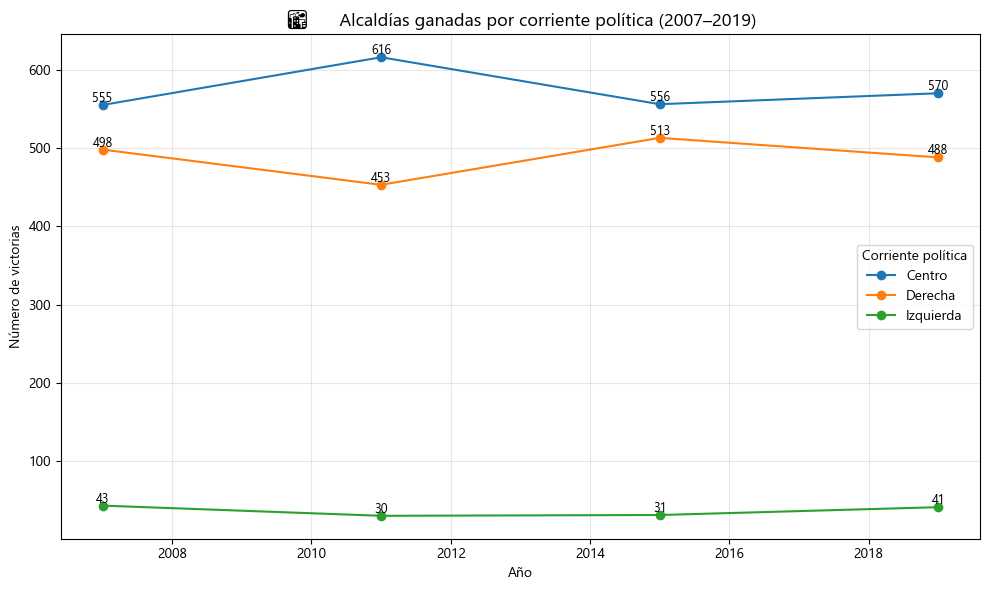

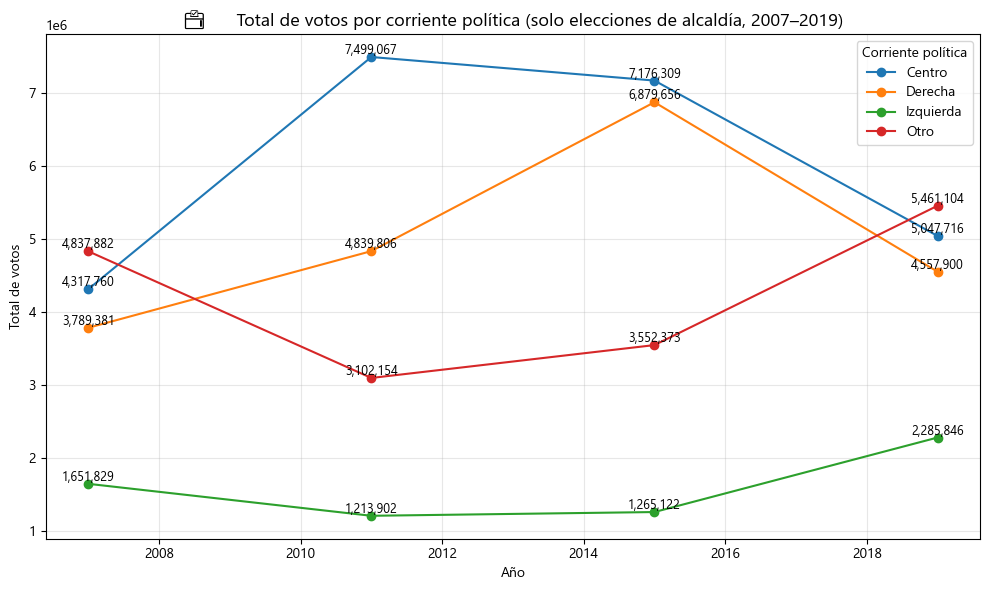

In [14]:
plt.rcParams['font.family'] = 'Segoe UI Emoji'  # Soporte para emojis en Windows
plt.rcParams['axes.unicode_minus'] = False # Evita error de signos en ejes


# 🏙️ Alcaldías ganadas
plt.figure(figsize=(10,6))
for col in victorias_alcaldia.columns:
    plt.plot(victorias_alcaldia.index, victorias_alcaldia[col], marker='o', label=col)
    # Mostrar etiquetas numéricas
    for x, y in zip(victorias_alcaldia.index, victorias_alcaldia[col]):
        plt.text(x, y, f"{y:,}", fontsize=9, ha='center', va='bottom')
plt.title("🏙️ Alcaldías ganadas por corriente política (2007–2019)", fontsize=13, weight='bold')
plt.xlabel("Año")
plt.ylabel("Número de victorias")
plt.legend(title="Corriente política")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

ds_top100["ideologia"] = ds_top100["partido_canon"].map(ideologia_map)

votos_por_ideologia = (
    ds_top100.groupby(["anio", "ideologia"])["votos"]
    .sum()
    .unstack(fill_value=0)
)

plt.figure(figsize=(10,6))
for col in votos_por_ideologia.columns:
    plt.plot(votos_por_ideologia.index, votos_por_ideologia[col],
             marker='o', label=col)
    # Etiquetas numéricas con formato miles
    for x, y in zip(votos_por_ideologia.index, votos_por_ideologia[col]):
        plt.text(x, y, f"{y:,.0f}", fontsize=9, ha='center', va='bottom')

plt.title("🗳️ Total de votos por corriente política (solo elecciones de alcaldía, 2007–2019)",
          fontsize=13, weight='bold')
plt.xlabel("Año")
plt.ylabel("Total de votos")
plt.legend(title="Corriente política")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

<div style="background-color:#d9d9d9; padding:15px; border-radius:8px;">
  <h2>🗳️ Análisis de elecciones presidenciales / Presidential elections analysis</h2>
  
  <p>Se filtran y analizan los registros de <strong>elecciones presidenciales</strong> en Colombia:  
  - Se identifican los tipos de elecciones presidenciales (primera y segunda vuelta).  
  - Se listan los partidos que han presentado candidatos presidenciales y el número de postulaciones únicas.  
  - Se define un <strong>diccionario de ideologías</strong> para clasificar partidos en <em>Izquierda</em>, <em>Centro</em>, <em>Derecha</em> y <em>Nulos/Blanco</em>.  
  - Se asigna la ideología correspondiente a cada registro y se verifica la distribución general.  
  <em>Objetivo:</em> Organizar y clasificar la información para estudiar tendencias ideológicas en elecciones presidenciales.</p>
  
  <p>Presidential election records in Colombia are filtered and analyzed:  
  - Types of presidential elections (first and second round) are identified.  
  - Parties that have presented presidential candidates are listed, along with the number of unique candidacies.  
  - An <strong>ideology dictionary</strong> is defined to classify parties into <em>Left</em>, <em>Center</em>, <em>Right</em>, and <em>Null/Blank</em>.  
  - The corresponding ideology is assigned to each record and the overall distribution is verified.  
  <em>Objective:</em> Organize and classify information to study ideological trends in presidential elections.</p>
</div>

In [15]:
df_presidencia = dataset[
    dataset["eleccion"].str.contains("presidencia", case=False, na=False)
].copy()

print(f"✅ Registros filtrados: {len(df_presidencia):,}")

print("\n📊 Tipos de elecciones presidenciales registradas:\n")
print(df_presidencia["eleccion"].value_counts())

partidos_presidenciales = (
    df_presidencia.groupby("partido_politico")["nombre_candidato"]
    .nunique()
    .sort_values(ascending=False)
)

print("\n🏛️ Partidos con candidatos presidenciales (ordenados por número de candidatos únicos):\n")
print(partidos_presidenciales)
print(f"\nTotal partidos que han tenido candidato presidencial: {partidos_presidenciales.shape[0]}")


✅ Registros filtrados: 71,540

📊 Tipos de elecciones presidenciales registradas:

eleccion
presidencia 1era vuelta    48234
presidencia 2da vuelta     23306
Name: count, dtype: int64

🏛️ Partidos con candidatos presidenciales (ordenados por número de candidatos únicos):

partido_politico
votos en blanco                                                            2
votos nulos                                                                2
partido conservador colombiano                                             2
votos no marcados                                                          2
partido verde                                                              2
alianza social afrocolombiana "asa"                                        1
centro democratico mano firme corazon grande                               1
coalicion #mejor vargas lleras ante todo colombia                          1
coalicion centro esperanza                                                 1
coalicion equipo p

In [16]:
ideologia_presidenciales = {
    # 🟥 Izquierda
    "coalicion pacto historico": "Izquierda",
    "coalicion petro presidente": "Izquierda",
    "polo democratico alternativo": "Izquierda",
    "polo democratico alternativo pda union patriotica up": "Izquierda",
    "union patriotica": "Izquierda",
    "partido verde oxigeno": "Izquierda",
    "movimiento la voz de la consciencia": "Izquierda",
    "coalicion colombia": "Izquierda",
    "partido verde": "Izquierda",
    "partido alianza verde": "Izquierda",

    # 🟩 Centro
    "coalicion centro esperanza": "Centro",
    "partido somos": "Centro",
    "movimiento politico todos somos colombia": "Centro",
    "coalicion par. liberal colombiano par. alianza social independiente asi": "Centro",
    "partido liberal colombiano": "Centro",
    "liga de gobernantes anticorrupcion": "Centro",

    # 🟦 Derecha
    "centro democratico mano firme corazon grande": "Derecha",
    "colombia piensa en grande": "Derecha",
    "partido centro democratico": "Derecha",
    "partido conservador colombiano": "Derecha",
    "partido cambio radical": "Derecha",
    "partido social de unidad nacional": "Derecha",
    "coalicion equipo por colombia": "Derecha",
    "coalicion #mejor vargas lleras ante todo colombia": "Derecha",
    "colombia justa libres": "Derecha",
    "partido movimiento de salvacion nacional": "Derecha",
    "alianza social afrocolombiana asa": "Derecha",
    "movimiento apertura liberal": "Derecha",
    "unidad nacional": "Derecha",

    # Nulos, en blanco y no marcados
    "votos en blanco": "Nulos_Blanco",
    "votos nulos": "Nulos_Blanco",
    "votos no marcados": "Nulos_Blanco",
    "votos blancos": "Nulos_Blanco",
    "voto en blanco": "Nulos_Blanco",
    "voto no marcados": "Nulos_Blanco",
}

# Asignar ideología
df_presidencia["ideologia"] = df_presidencia["partido_politico"].map(ideologia_presidenciales).fillna("Otros")

# Verificar conteo
print("\n📊 Distribución de ideologías:")
print(df_presidencia["ideologia"].value_counts())



📊 Distribución de ideologías:
ideologia
Nulos_Blanco    27672
Derecha         19616
Izquierda       13934
Centro           8152
Otros            2166
Name: count, dtype: int64


<div style="background-color:#d9d9d9; padding:15px; border-radius:8px;">
  <h2>📈 Evolución de votos por corriente política / Evolution of votes by political current</h2>
  
  <p>Se generan gráficos de líneas para mostrar la evolución de votos presidenciales por corriente política entre <strong>2002 y 2022</strong>:  
  - En la <strong>primera vuelta</strong>, se observa la distribución de votos entre Izquierda, Centro, Derecha y Nulos/Blanco.  
  - En la <strong>segunda vuelta</strong>, se comparan las tendencias de apoyo ciudadano en los enfrentamientos decisivos.  
  - Se añaden etiquetas numéricas sobre cada punto para facilitar la lectura de valores exactos.  
  <em>Objetivo:</em> Visualizar cómo ha cambiado el apoyo a cada corriente política en las últimas dos décadas.</p>
  
  <p>Line charts are generated to show the evolution of presidential votes by political current between <strong>2002 and 2022</strong>:  
  - In the <strong>first round</strong>, the distribution of votes among Left, Center, Right, and Null/Blank is observed.  
  - In the <strong>second round</strong>, citizen support trends are compared in decisive matchups.  
  - Numeric labels are added above each point to facilitate reading of exact values.  
  <em>Objective:</em> Visualize how support for each political current has changed over the last two decades.</p>
</div>

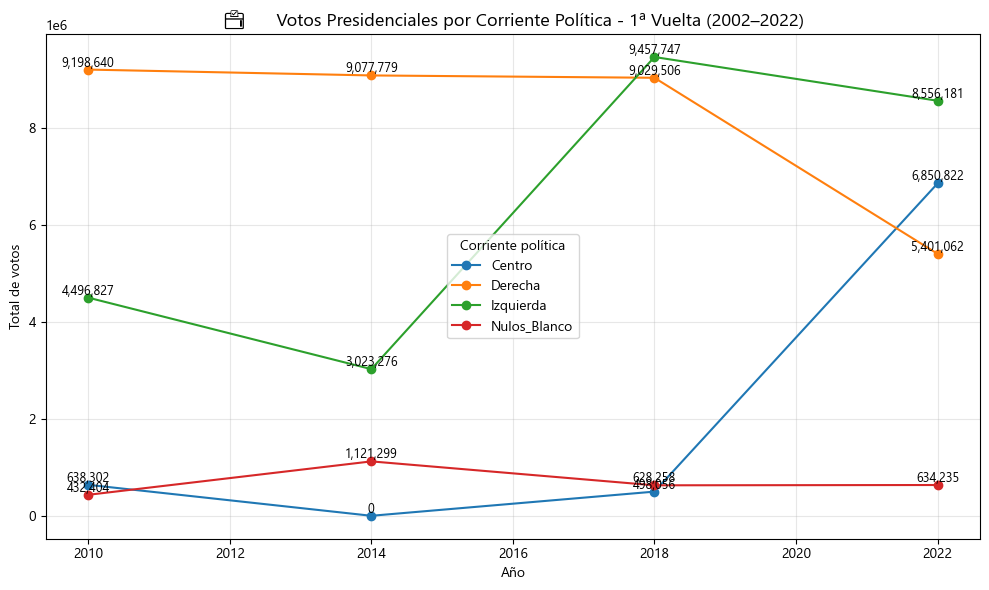

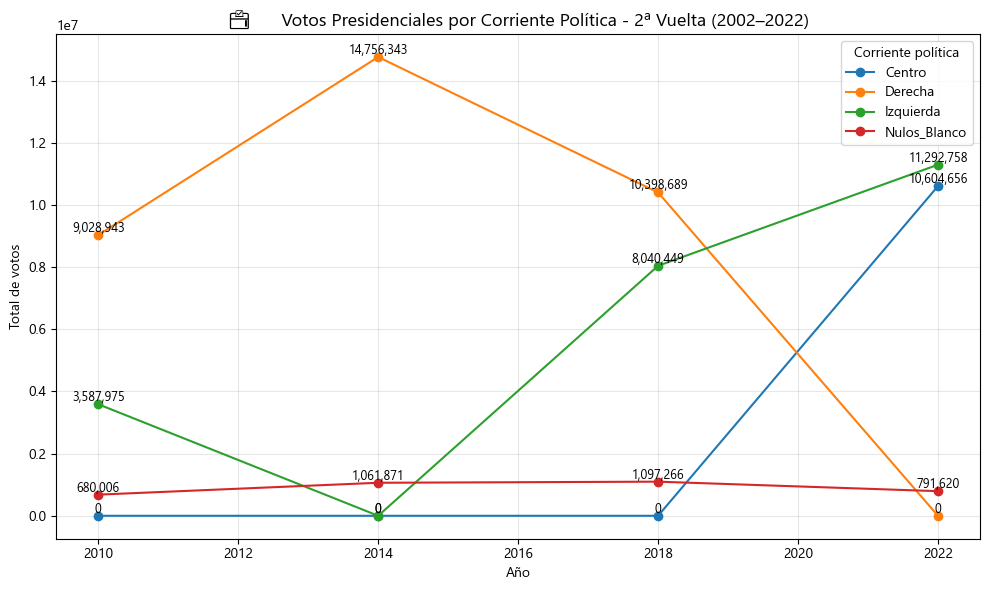

In [17]:
df_presidencia_filtrado = df_presidencia[
    df_presidencia["ideologia"].isin(["Izquierda", "Centro", "Derecha", "Nulos_Blanco"])
]

df_presidencia_1v = df_presidencia_filtrado[
    df_presidencia_filtrado["eleccion"].str.contains("1era", case=False, na=False)
]

votos_presidenciales_1v = (
    df_presidencia_1v.groupby(["anio", "ideologia"])["votos"]
    .sum()
    .unstack(fill_value=0)
)

plt.figure(figsize=(10,6))
for col in votos_presidenciales_1v.columns:
    plt.plot(votos_presidenciales_1v.index, votos_presidenciales_1v[col], marker='o', label=col)
    for x, y in zip(votos_presidenciales_1v.index, votos_presidenciales_1v[col]):
        plt.text(x, y, f"{y:,.0f}", fontsize=9, ha='center', va='bottom')

plt.title("🗳️ Votos Presidenciales por Corriente Política - 1ª Vuelta (2002–2022)", fontsize=13, weight='bold')
plt.xlabel("Año")
plt.ylabel("Total de votos")
plt.legend(title="Corriente política")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

df_presidencia_2v = df_presidencia_filtrado[
    df_presidencia_filtrado["eleccion"].str.contains("2da", case=False, na=False)
]

votos_presidenciales_2v = (
    df_presidencia_2v.groupby(["anio", "ideologia"])["votos"]
    .sum()
    .unstack(fill_value=0)
)

plt.figure(figsize=(10,6))
for col in votos_presidenciales_2v.columns:
    plt.plot(votos_presidenciales_2v.index, votos_presidenciales_2v[col], marker='o', label=col)
    for x, y in zip(votos_presidenciales_2v.index, votos_presidenciales_2v[col]):
        plt.text(x, y, f"{y:,.0f}", fontsize=9, ha='center', va='bottom')

plt.title("🗳️ Votos Presidenciales por Corriente Política - 2ª Vuelta (2002–2022)", fontsize=13, weight='bold')
plt.xlabel("Año")
plt.ylabel("Total de votos")
plt.legend(title="Corriente política")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

<div style="background-color:#d9d9d9; padding:15px; border-radius:8px;">
  <h2>🗺️ Mapa geográfico de corrientes políticas — Presidencia 1ª vuelta (2022) / Geographic map of political currents — Presidency 1st round (2022)</h2>
  
  <p>Se construye un mapa interactivo con <strong>Folium</strong> para mostrar la corriente política dominante en cada departamento durante la primera vuelta presidencial de 2022:  
  - Se normalizan los nombres de departamentos para asegurar la correspondencia con el shapefile oficial.  
  - Se agregan equivalencias especiales para casos como <em>Bogotá</em> y <em>San Andrés</em>.  
  - Se calculan los votos por departamento e ideología y se pivotan los resultados para integrarlos con el mapa.  
  - Se asignan colores pastel a cada corriente política: azul para Derecha, verde para Centro, rojo coral para Izquierda y lila para Nulos/Blanco.  
  - Se incluye un <strong>popup</strong con detalle de votos por corriente y una leyenda personalizada.  
  <em>Objetivo:</em> Representar espacialmente la distribución ideológica de los votos presidenciales en la primera vuelta de 2022.</p>
  
  <p>An interactive map is built with <strong>Folium</strong> to show the dominant political current in each department during the 2022 presidential first round:  
  - Department names are normalized to ensure correspondence with the official shapefile.  
  - Special equivalences are added for cases such as <em>Bogotá</em> and <em>San Andrés</em>.  
  - Votes by department and ideology are calculated and pivoted to integrate with the map.  
  - Pastel colors are assigned to each political current: blue for Right, green for Center, coral red for Left, and lilac for Null/Blank.  
  - A <strong>popup</strong with vote details by current and a customized legend are included.  
  <em>Objective:</em> Spatially represent the ideological distribution of presidential votes in the first round of 2022.</p>
</div>

In [23]:
def limpiar_texto_upper(texto):
    if pd.isna(texto):
        return ""
    texto = str(texto).strip().lower()
    texto = "".join(
        c for c in unicodedata.normalize("NFD", texto)
        if unicodedata.category(c) != "Mn"
    )
    return texto.upper()

m = folium.Map(location=[4.5709, -74.2973], zoom_start=6)

geo_path = "../mapas/geoBoundaries-COL-ADM1.geojson"
departamentos = gpd.read_file(geo_path)
departamentos["shapeName"] = departamentos["shapeName"].apply(limpiar_texto_upper)

df_presidencia_1v = dataset[
    (dataset["anio"] == 2022) &
    (dataset["eleccion"].str.contains("presidencia 1era vuelta", case=False, na=False))
].copy()

# limpiar y normalizar departamentos
df_presidencia_1v["departamento"] = df_presidencia_1v["departamento"].apply(limpiar_texto_upper)

# equivalencias especiales
map_deptos = {
    "BOGOTA": "BOGOTA CAPITAL DISTRICT",
    "ARCHIPIELAGO DE SAN ANDRES": "ARCHIPIELAGO DE SAN ANDRES, PROVIDENCIA Y SANTA CATALINA",
    "CONSULADOS": None  # no existe en shapefile
}
df_presidencia_1v["departamento"] = df_presidencia_1v["departamento"].replace(map_deptos)

# mapear ideología
df_presidencia_1v["ideologia"] = df_presidencia_1v["partido_politico"].map(ideologia_presidenciales)

agg = (
    df_presidencia_1v.groupby(["departamento", "ideologia"])["votos"]
    .sum()
    .reset_index()
)

pivot = agg.pivot(index="departamento", columns="ideologia", values="votos").fillna(0).astype(int).reset_index()

geo_merged = departamentos.merge(pivot, left_on="shapeName", right_on="departamento", how="left")

colores_corriente = {
    "Derecha": "#9ecae1",     
    "Centro": "#a1d99b",      
    "Izquierda": "#fcae91",   
    "Nulos_Blanco": "#cbc9e2",
    "Sin datos": "#f7f7f7"    
}

gj = folium.GeoJson(
    data=geo_merged.to_json(),
    name="Corriente dominante",
    style_function=lambda feature: {
        "fillColor": colores_corriente.get(
            max(
                ["Derecha","Centro","Izquierda","Nulos_Blanco"],
                key=lambda k: feature["properties"].get(k,0)
            ),
            "#cccccc"
        ),
        "color": "black",
        "weight": 0.5,
        "fillOpacity": 0.8,
    },
    popup=folium.GeoJsonPopup(
        fields=["shapeName","Derecha","Centro","Izquierda","Nulos_Blanco"],
        aliases=["Departamento","Derecha","Centro","Izquierda","Nulos/Blanco"],
        localize=True
    )
).add_to(m)

legend_html = """
<div style="
position: fixed;
bottom: 50px; left: 50px; width: 230px; height: 160px;
background-color: white; border:2px solid grey; z-index:9999; font-size:14px;padding:8px;
">
<b>Corriente dominante - Presidencia 1ª vuelta (2022)</b><br>
&nbsp;<i style="background:#9ecae1;width:12px;height:12px;display:inline-block;margin-right:8px;"></i> Derecha<br>
&nbsp;<i style="background:#a1d99b;width:12px;height:12px;display:inline-block;margin-right:8px;"></i> Centro<br>
&nbsp;<i style="background:#fcae91;width:12px;height:12px;display:inline-block;margin-right:8px;"></i> Izquierda<br>
&nbsp;<i style="background:#cbc9e2;width:12px;height:12px;display:inline-block;margin-right:8px;"></i> Nulos / Blanco<br>
&nbsp;<i style="background:#f7f7f7;width:12px;height:12px;display:inline-block;margin-right:8px;border:1px solid #ccc;"></i> Sin datos<br>
</div>
"""
m.get_root().html.add_child(folium.Element(legend_html))

# --- guardar y mostrar ---
ruta_mapa = "../mapas/mapa_corrientes_presidencia_1v_2022.html"
m.save(ruta_mapa)
print("✅ Mapa guardado en:", ruta_mapa)

html_content = f"""
<iframe src="{ruta_mapa}" width="100%" height="600"></iframe>
"""
display(HTML(html_content))

✅ Mapa guardado en: ../mapas/mapa_corrientes_presidencia_1v_2022.html


<div style="background-color: #e6f2ff; padding: 25px; border-radius: 12px; font-family: 'Segoe UI', sans-serif; color: #333; line-height: 1.6;">

<h2 style="color: #0d47a1;">🧩 <strong>Conclusions — Political Trends in Local and Presidential Elections</strong></h2>

<h3 style="color: #1565c0;">🏙️ Mayoral Elections (2007–2019)</h3>
<ul>
  <li><strong>Right-wing parties</strong> consistently won the most mayoral seats, with over 550 victories in each cycle.</li>
  <li><strong>Center-oriented parties</strong> maintained stable performance, averaging around 480 victories per election.</li>
  <li><strong>Left-wing parties</strong> had limited success, with fewer than 45 mayoral wins per cycle, though they showed slight growth in 2019.</li>
  <li>In terms of total votes, the <strong>Center and Right</strong> dominated, while the <strong>Left</strong> doubled its vote count between 2015 and 2019.</li>
</ul>

<h3 style="color: #1565c0;">🗳️ Presidential Elections (2002–2022)</h3>
<ul>
  <li>In the <strong>first round</strong>, the Right led until 2014, but the <strong>Left overtook it in 2018</strong> and remained dominant in 2022.</li>
  <li>The <strong>Center</strong> surged in 2022, reaching nearly 7 million votes, its highest historical level.</li>
  <li>In the <strong>second round</strong>, the Right dominated until 2018, but in 2022 the Left won with over <strong>11 million votes</strong>, while the Center also gained significant ground.</li>
</ul>

<h3 style="color: #1565c0;">🗺️ Regional Patterns — Presidency 1st Round (2022)</h3>
<ul>
  <li>The map shows a clear <strong>regional divide</strong>:  
    - <strong>Left-wing dominance</strong> in the Pacific, Caribbean, and southern departments.  
    - <strong>Center-oriented victories</strong> in Bogotá, Boyacá, and parts of the Andes.  
    - <strong>Right-wing strength</strong> in Antioquia and northern interior regions.</li>
  <li>Null and blank votes were significant in some departments, but did not dominate in any region.</li>
</ul>

<h3 style="color: #1565c0;">⚠️ About Ideological Classification</h3>
<p>The distribution of parties by political orientation was based on a personal criterion informed by historical patterns of behavior and discourse. While this may not be entirely objective, it reflects the current political reality in Colombia, where individuals and parties often deviate from the ideologies they claim to represent or oppose. This classification responds to the evolving context of each electoral scenario.</p>

<blockquote>These findings reveal a shift in Colombia’s political landscape: while the Right remains strong locally, the Left has gained national momentum, and the Center has emerged as a competitive force in presidential elections.</blockquote>
</div>

<div style="background-color: #e6ffe6; padding: 25px; border-radius: 12px; font-family: 'Segoe UI', sans-serif; color: #333; line-height: 1.6;">

<h2 style="color: #0d47a1;">🧩 <strong>Conclusiones — Tendencias Políticas en Elecciones Locales y Presidenciales</strong></h2>

<h3 style="color: #1565c0;">🏙️ Elecciones de Alcaldía (2007–2019)</h3>
<ul>
  <li>Los partidos de <strong>Derecha</strong> ganaron consistentemente la mayor cantidad de alcaldías, con más de 550 por ciclo.</li>
  <li>Los partidos de <strong>Centro</strong> mantuvieron un desempeño estable, con un promedio de 480 alcaldías por elección.</li>
  <li>Los partidos de <strong>Izquierda</strong> tuvieron éxito limitado, con menos de 45 alcaldías por ciclo, aunque mostraron un leve crecimiento en 2019.</li>
  <li>En votos totales, <strong>Centro y Derecha</strong> dominaron, mientras que la <strong>Izquierda</strong> duplicó su votación entre 2015 y 2019.</li>
</ul>

<h3 style="color: #1565c0;">🗳️ Elecciones Presidenciales (2002–2022)</h3>
<ul>
  <li>En la <strong>primera vuelta</strong>, la Derecha lideró hasta 2014, pero la <strong>Izquierda la superó en 2018</strong> y se mantuvo dominante en 2022.</li>
  <li>El <strong>Centro</strong> tuvo un repunte en 2022, alcanzando casi 7 millones de votos, su nivel más alto históricamente.</li>
  <li>En la <strong>segunda vuelta</strong>, la Derecha dominó hasta 2018, pero en 2022 la Izquierda ganó con más de <strong>11 millones de votos</strong>, y el Centro también creció significativamente.</li>
</ul>

<h3 style="color: #1565c0;">🗺️ Patrones Regionales — Presidencia 1ª Vuelta (2022)</h3>
<ul>
  <li>El mapa muestra una clara <strong>división regional</strong>:  
    - <strong>Dominio de la Izquierda</strong> en el Pacífico, Caribe y departamentos del sur.  
    - <strong>Victorias del Centro</strong> en Bogotá, Boyacá y zonas andinas.  
    - <strong>Fortaleza de la Derecha</strong> en Antioquia y regiones del interior norte.</li>
  <li>Los votos nulos y en blanco fueron relevantes en algunos departamentos, pero no dominaron en ninguna región.</li>
</ul>

<h3 style="color: #1565c0;">⚠️ Sobre la Clasificación Ideológica</h3>
<p>La distribución de los partidos por ideologías políticas se hizo en base a un criterio personal y teniendo en cuenta patrones históricos de sus comportamientos y pensamientos. Si bien puede no ser completamente objetiva, se acerca a la realidad actual de Colombia, donde personas y partidos en ocasiones se desvían de la ideología que dicen defender o atacar. Esta clasificación responde al contexto político cambiante en cada escenario electoral.</p>

<blockquote>Estos hallazgos revelan un cambio en el panorama político colombiano: mientras la Derecha se mantiene fuerte a nivel local, la Izquierda ha ganado impulso nacional, y el Centro emerge como fuerza competitiva en elecciones presidenciales.</blockquote>
</div>